In [ ]:
!pip install opendatasets

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset")

Skipping, found downloaded files in "./covid19-image-dataset" (use force=True to force download)


In [ ]:
train_dir="/content/covid19-image-dataset/Covid19-dataset/train"
test_dir="/content/covid19-image-dataset/Covid19-dataset/test"

In [ ]:
train_dataset=image_dataset_from_directory( train_dir,batch_size=64,class_names=["Covid","Normal","Viral Pneumonia"],image_size=(224,224),seed=123)
test_dataset=image_dataset_from_directory( test_dir,batch_size=64,class_names=["Covid","Normal","Viral Pneumonia"],image_size=(224,224),seed=123)

Found 251 files belonging to 3 classes.
Found 66 files belonging to 3 classes.


In [ ]:
train_dataset.class_names

['Covid', 'Normal', 'Viral Pneumonia']

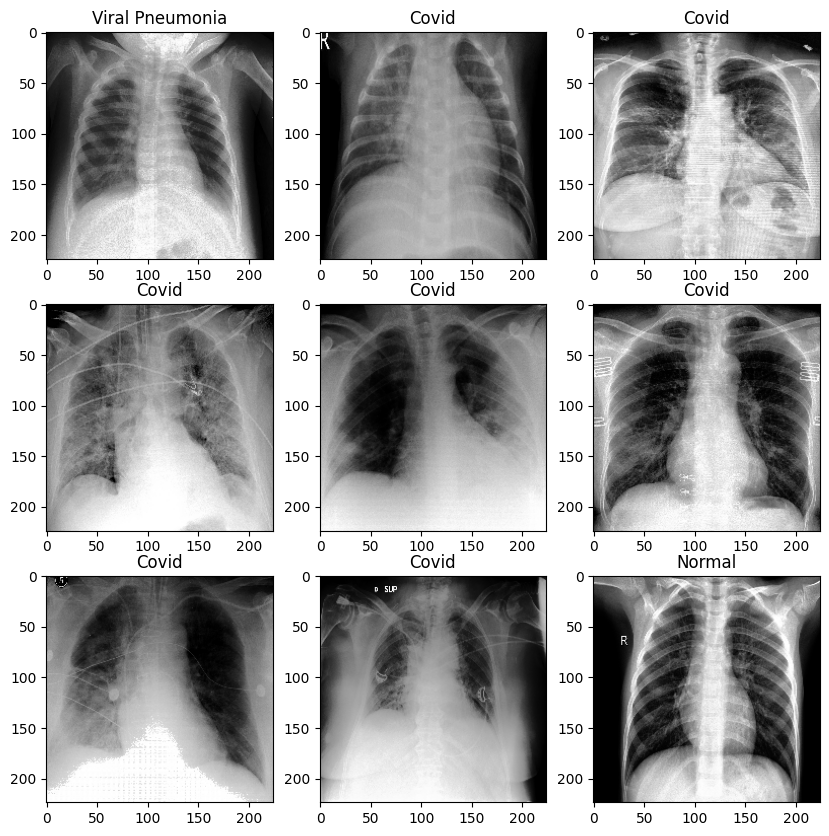

In [ ]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])

**sequential layer**

build a sequential CNN

In [ ]:

model = Sequential()
########Feature Extraction Layers###############
#Block 1
model.add(Conv2D(128, 3, padding='same', activation='relu', input_shape=(160,160,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#Block 2
model.add(Conv2D(256, 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#Block 3
model.add(Conv2D(512, 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#Block 4
model.add(Conv2D(1024, 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#block 5
model.add(Conv2D(2048, 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#block 6
model.add(Conv2D(4096, 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
###########Classification Layers#################
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model = Sequential()
########Feature Extraction Layers###############
#Block 1
model.add(Conv2D(128, 3, padding='same', activation='relu', input_shape=(224,224,3))) # Match input shape to the actual image size
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#Block 2
model.add(Conv2D(256, 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#Block 3
model.add(Conv2D(512, 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#Block 4
model.add(Conv2D(1024, 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
###########Classification Layers#################
model.add(Flatten())
# Calculate the correct input size for the dense layer
# You can print the output shape of the Flatten layer using model.summary() after defining the model
# and use that value to set the input_dim of the Dense layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 224, 224, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 112, 112, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 112, 112, 256)       │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 56, 56, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 28, 28, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 28, 28, 1024)        │       4,719,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 14, 14, 1024)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 200704)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │      51,380,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57,579,265 (219.65 MB)

 Trainable params: 57,579,265 (219.65 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

**Fit the model**

In [ ]:
hist=model.fit(train_dataset,epochs=100,validation_data=test_dataset,batch_size=32)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.3248 - loss: 657.6791 - val_accuracy: 0.3030 - val_loss: -28.6852
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.3334 - loss: -63.8395 - val_accuracy: 0.3030 - val_loss: -1315.7203
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.2654 - loss: -3366.5300 - val_accuracy: 0.3333 - val_loss: -13382.7744
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.4019 - loss: -63247.5508 - val_accuracy: 0.3030 - val_loss: -221303.3594
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.3152 - loss: -617053.6875 - val_accuracy: 0.3182 - val_loss: -1611406.5000
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.3449 - loss: -3479352.5000 - val_accuracy: 0.3333 - val_loss: -8785955.0000
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.3634 - loss: -14682083.0000 - val_accuracy: 0.3939 - val_loss: -19564346.0000
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accura

**plot the model across epochs**

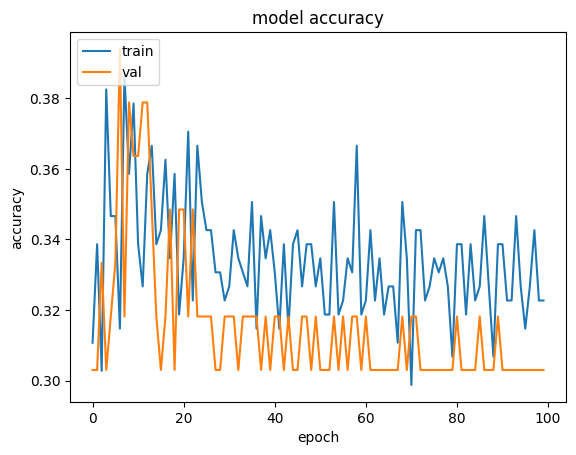

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()

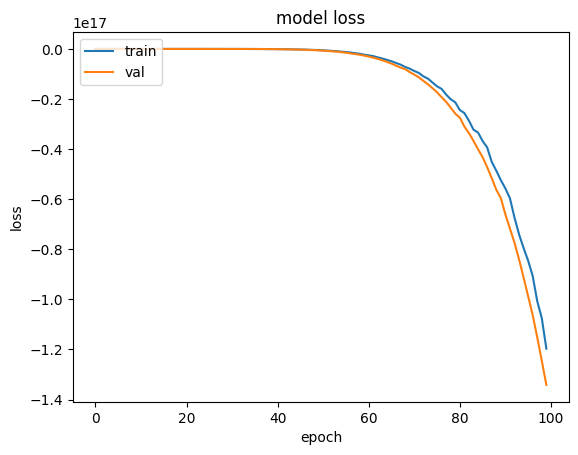

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()

**confusion matrix**

In [ ]:
y_hat_train=model.predict(train_dataset)
y_hat_test=model.predict(test_dataset)

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 693ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 304ms/step


In [ ]:
y_true_train = np.array([label.numpy() for _, labels in train_dataset for label in labels])

In [ ]:
y_true_test = np.array([label.numpy() for _, labels in test_dataset for label in labels])

In [ ]:
def model_eval(actual , predicted):
  conf_matrix = confusion_matrix(actual , predicted)
  clas_rep = classification_report(actual , predicted)
  acc_score = accuracy_score(actual , predicted)

  print("The Accuracy of the Model is:" , round(acc_score , 2))
  print(conf_matrix)
  print(clas_rep)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
model_eval(y_true_train,y_hat_train.round())

The Accuracy of the Model is: 0.28
[[  4 107   0]
 [  3  67   0]
 [  3  67   0]]
              precision    recall  f1-score   support

           0       0.40      0.04      0.07       111
           1       0.28      0.96      0.43        70
           2       0.00      0.00      0.00        70

    accuracy                           0.28       251
   macro avg       0.23      0.33      0.17       251
weighted avg       0.25      0.28      0.15       251



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model_eval(y_true_test,y_hat_test.round())

The Accuracy of the Model is: 0.3
[[ 0 26  0]
 [ 0 20  0]
 [ 0 20  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.30      1.00      0.47        20
           2       0.00      0.00      0.00        20

    accuracy                           0.30        66
   macro avg       0.10      0.33      0.16        66
weighted avg       0.09      0.30      0.14        66



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
